In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

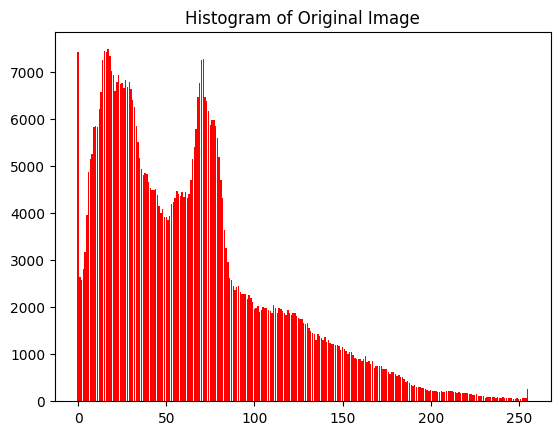

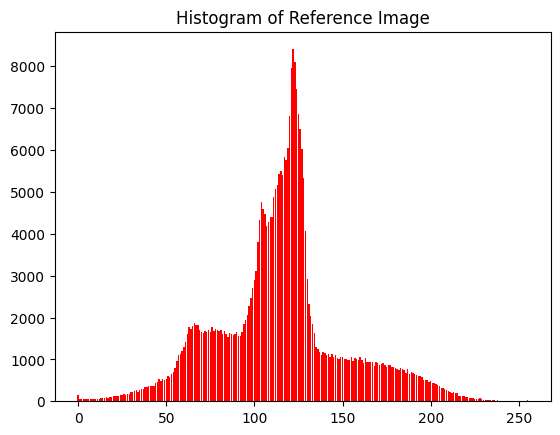

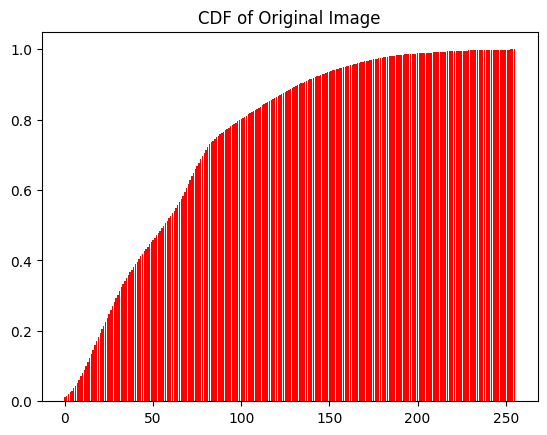

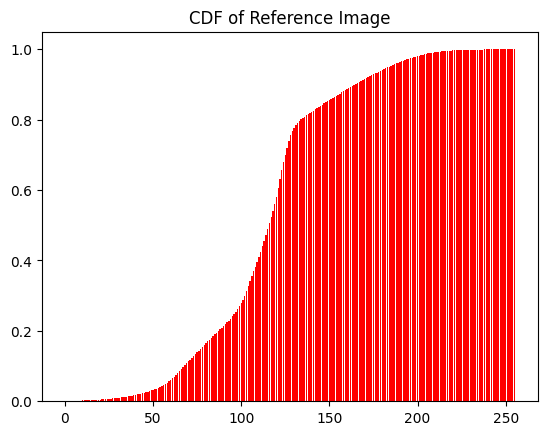

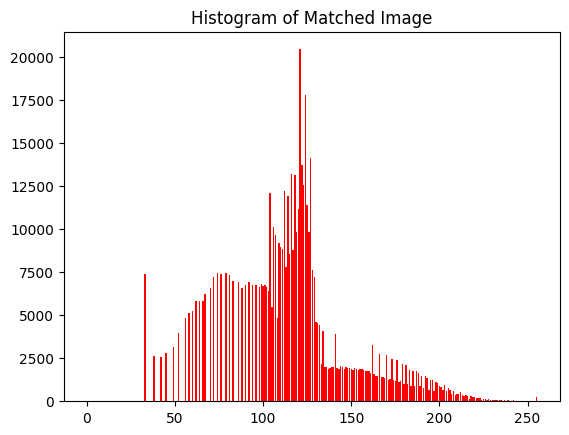

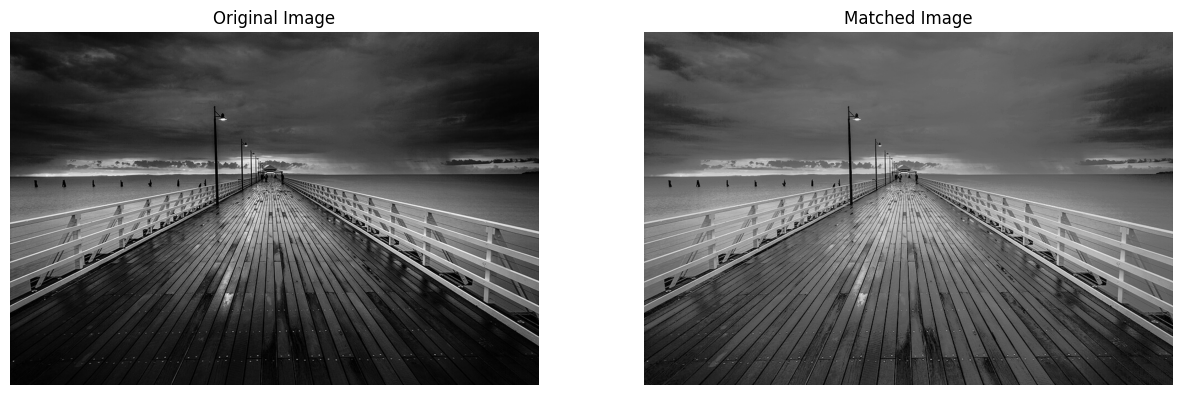

In [4]:
def histogram_matching(img, referenceImg):
    img = cv.imread(img, cv.IMREAD_GRAYSCALE)
    referenceImg = cv.imread(referenceImg, cv.IMREAD_GRAYSCALE)
    
    def calculate_histogram(image):
        hist = np.zeros(256, dtype=np.float32)
        for pixel in image.ravel():
            hist[pixel] += 1
        return hist

    def calculate_cdf(hist):
        cdf = np.cumsum(hist)
        cdf = cdf / cdf[-1]
        return cdf

    def mapping_function(img, cdfOriginal, cdfReference):
        lookup = np.zeros(256, dtype="uint8")
        for i in range(256):
            differences = np.abs(cdfReference - cdfOriginal[i])
            lookup[i] = np.argmin(differences)
        return lookup

    histOriginal = calculate_histogram(img)
    plt.bar(range(256), histOriginal, color='red')
    plt.title("Histogram of Original Image")
    plt.show()

    histReference = calculate_histogram(referenceImg)
    plt.bar(range(256), histReference, color='red')
    plt.title("Histogram of Reference Image")
    plt.show()

    cdfOriginal = calculate_cdf(histOriginal)
    cdfReference = calculate_cdf(histReference)

    plt.bar(range(256), cdfOriginal, color='red')
    plt.title("CDF of Original Image")
    plt.show()
    plt.bar(range(256), cdfReference, color='red')
    plt.title("CDF of Reference Image")
    plt.show()

    lookup = mapping_function(img, cdfOriginal, cdfReference)
    matchImage = lookup[img]
    
    histMatchImage = calculate_histogram(matchImage)
    plt.bar(range(256), histMatchImage, color='red')
    plt.title("Histogram of Matched Image")
    plt.show()

    return matchImage


img1 = "originalImage.jpg"
img2 = "img.jpg"
matchImage = histogram_matching(img1, img2)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.imshow(cv.imread(img1, cv.IMREAD_GRAYSCALE), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(matchImage, cmap="gray")
plt.title("Matched Image")
plt.axis("off")

plt.show()
